In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from tqdm import tqdm 

In [2]:
# AFFINE TRANSFORMATION
img1 = cv2.imread("chest_xray/train/NORMAL/IM-0115-0001.jpeg")
h,w = img1.shape[:2]

q_h,q_w = h/4,w/4
T = np.float32([[1,0,q_w],[0,1,q_h]])
img_translation = cv2.warpAffine(img1,T,(w,h))
img_translation = cv2.resize(img_translation,(400,400))
cv2.imshow('Translation',img_translation)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
NORMAL_DIR = "chest_xray/test/NORMAL/"
PNEUMONIA_DIR = "chest_xray/test/PNEUMONIA/"

def get_data(Dir,SubDir):
    i=1
    temp = Dir 
    print(temp)
    for file in tqdm(os.listdir(temp)):
        img = cv2.imread(temp + '/' + file)
        h,w = img.shape[:2]
        q_h,q_w = h/4,w/4
        T = np.float32([[1,0,q_w],[0,1,q_h]])
        img_translation = cv2.warpAffine(img,T,(w,h))
        img_translation = cv2.resize(img_translation,(400,400))
        cv2.imwrite(("Affine/"+SubDir+"/save"+str(i)+'.jpg'),img_translation)
        i+=1
        
get_data(NORMAL_DIR,"NORMAL")
get_data(PNEUMONIA_DIR,"PNEUMONIA")

chest_xray/test/NORMAL/


100%|███████████████████████████████████████████| 234/234 [00:16<00:00, 13.89it/s]


chest_xray/test/PNEUMONIA/


100%|███████████████████████████████████████████| 390/390 [00:12<00:00, 31.53it/s]


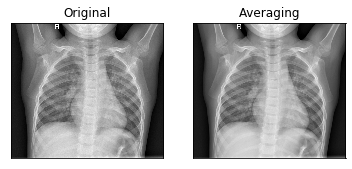

In [4]:
# 2D Convolution ( Image Filtering )
img = cv2.imread("chest_xray/train/NORMAL/IM-0115-0001.jpeg")
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()


In [5]:
NORMAL_DIR = "chest_xray/test/NORMAL/"
PNEUMONIA_DIR = "chest_xray/test/PNEUMONIA/"

def get_data(Dir,SubDir):
    i=1
    temp = Dir 
    print(temp)
    for file in tqdm(os.listdir(temp)):
        img = cv2.imread(temp + '/' + file)
        kernel = np.ones((5,5),np.float32)/25
        dst = cv2.filter2D(img,-1,kernel)
        img_translation = cv2.resize(dst,(400,400))
        cv2.imwrite(("2DConv/"+SubDir+"/save"+str(i)+'.jpg'),img_translation)
        i+=1
        
get_data(NORMAL_DIR,"NORMAL")
get_data(PNEUMONIA_DIR,"PNEUMONIA")

chest_xray/test/NORMAL/


100%|███████████████████████████████████████████| 234/234 [00:19<00:00, 11.75it/s]


chest_xray/test/PNEUMONIA/


100%|███████████████████████████████████████████| 390/390 [00:14<00:00, 26.77it/s]


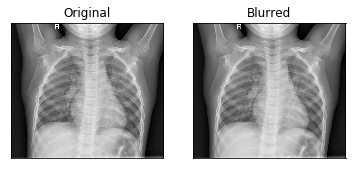

In [6]:
# Image Blurring (Image Smoothing)
img = cv2.imread("chest_xray/train/NORMAL/IM-0115-0001.jpeg")
blur = cv2.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


In [7]:
NORMAL_DIR = "chest_xray/test/NORMAL/"
PNEUMONIA_DIR = "chest_xray/test/PNEUMONIA/"

def get_data(Dir,SubDir):
    i=1
    temp = Dir 
    print(temp)
    for file in tqdm(os.listdir(temp)):
        img = cv2.imread(temp + '/' + file)
        blur = cv2.blur(img,(5,5))
        img_translation = cv2.resize(blur,(400,400))
        cv2.imwrite(("Blurring/"+SubDir+"/save"+str(i)+'.jpg'),img_translation)
        i+=1
        
get_data(NORMAL_DIR,"NORMAL")
get_data(PNEUMONIA_DIR,"PNEUMONIA")

chest_xray/test/NORMAL/


100%|███████████████████████████████████████████| 234/234 [00:15<00:00, 14.76it/s]


chest_xray/test/PNEUMONIA/


100%|███████████████████████████████████████████| 390/390 [00:14<00:00, 26.74it/s]


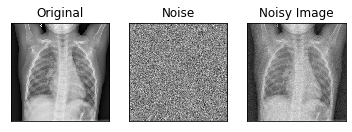

-1

In [8]:
mean = 0
var = 40
img = cv2.imread("chest_xray/train/NORMAL/IM-0115-0001.jpeg")
img = cv2.resize(img,(224,224))
sigma = var ** 0.7
gaussian = np.random.normal(mean, sigma, (224, 224))
noisy_image = np.zeros(img.shape, np.float32)
noisy_image[:, :, 0] = img[:, :, 0] + gaussian
noisy_image[:, :, 1] = img[:, :, 1] + gaussian
noisy_image[:, :, 2] = img[:, :, 2] + gaussian
cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
noisy_image = noisy_image.astype(np.uint8)
noisy_image = cv2.resize(noisy_image,(400,400))
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gaussian,'gray'),plt.title('Noise')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(noisy_image),plt.title('Noisy Image')
plt.xticks([]), plt.yticks([])
plt.show()
path = "C:\\Users\\akulg\\Downloads\\VIT Downloads\\ITE1010-Digital Image Processing\\DIP Project"
cv2.imwrite(os.path.join(path , 'noisy_image.jpg'), noisy_image)
cv2.waitKey(0)

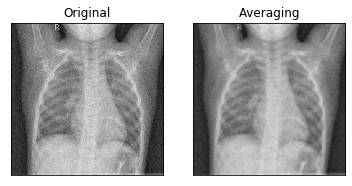

In [9]:
#2D convlolution
img = cv2.imread("noisy_image.jpg")
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

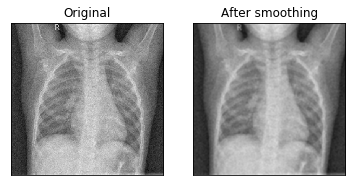

In [10]:
#Image Blurring (Image Smoothing)
#1. Averaging
img = cv2.imread("noisy_image.jpg")
blur = cv2.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('After smoothing')
plt.xticks([]), plt.yticks([])
plt.show()

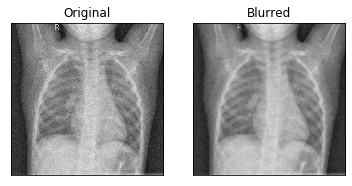

In [11]:
#3. Median Filtering
img = cv2.imread("noisy_image.jpg")
median = cv2.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
NORMAL_DIR = "chest_xray/test/NORMAL/"
PNEUMONIA_DIR = "chest_xray/test/PNEUMONIA/"

def get_data(Dir,SubDir):
    i=1
    temp = Dir 
    print(temp)
    for file in tqdm(os.listdir(temp)):
        img = cv2.imread(temp + '/' + file)
        median = cv2.medianBlur(img,5)
        img_translation = cv2.resize(median,(400,400))
        cv2.imwrite(("Median/"+SubDir+"/save"+str(i)+'.jpg'),img_translation)
        i+=1
        
get_data(NORMAL_DIR,"NORMAL")
get_data(PNEUMONIA_DIR,"PNEUMONIA")

chest_xray/test/NORMAL/


100%|███████████████████████████████████████████| 234/234 [00:18<00:00, 12.47it/s]


chest_xray/test/PNEUMONIA/


100%|███████████████████████████████████████████| 390/390 [00:13<00:00, 28.60it/s]


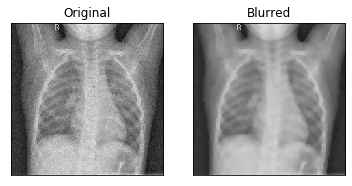

In [13]:
#4 Bilateral Filtering
img = cv2.imread("noisy_image.jpg")
img = cv2.resize(img,(224,224))
blur = cv2.bilateralFilter(img,9,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
NORMAL_DIR = "chest_xray/test/NORMAL/"
PNEUMONIA_DIR = "chest_xray/test/PNEUMONIA/"

def get_data(Dir,SubDir):
    i=1
    temp = Dir 
    print(temp)
    for file in tqdm(os.listdir(temp)):
        img = cv2.imread(temp + '/' + file)
        bilateral = cv2.bilateralFilter(img,9,75,75)
        img_translation = cv2.resize(bilateral,(400,400))
        cv2.imwrite(("Bilateral/"+SubDir+"/save"+str(i)+'.jpg'),img_translation)
        i+=1
        
get_data(NORMAL_DIR,"NORMAL")
get_data(PNEUMONIA_DIR,"PNEUMONIA")

chest_xray/test/NORMAL/


100%|███████████████████████████████████████████| 234/234 [01:34<00:00,  2.47it/s]


chest_xray/test/PNEUMONIA/


100%|███████████████████████████████████████████| 390/390 [01:03<00:00,  6.17it/s]


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

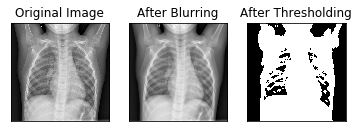

In [15]:
img = cv2.imread("noisy_image.jpg",0)
img = cv2.imread("chest_xray/train/NORMAL/IM-0115-0001.jpeg",0)
img = cv2.resize(img,(400,400))
blur = cv2.GaussianBlur(img,(5,5),0)
ret,thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(131),plt.imshow(img,'gray'),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur,'gray'),plt.title('After Blurring')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(thresh,'gray'),plt.title('After Thresholding')
plt.xticks([]), plt.yticks([])

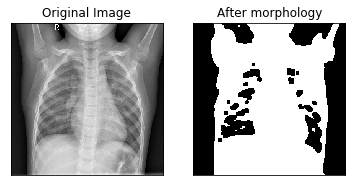

In [16]:
kernel = np.ones((3, 3), np.uint8) 
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 2)
bg = cv2.dilate(closing, kernel, iterations = 1)
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0) 
ret, fg = cv2.threshold(dist_transform, 0.02* dist_transform.max(), 255, 0)
plt.subplot(121),plt.imshow(img,'gray'),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(fg,'gray'),plt.title('After morphology')
plt.xticks([]), plt.yticks([])
plt.show()

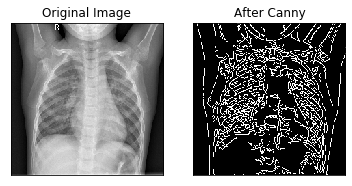

In [17]:
img = cv2.imread("chest_xray/train/NORMAL/IM-0115-0001.jpeg")
img = cv2.resize(img,(224,224))
gray = cv2.cvtColor(src = img, code = cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray,30,200)

plt.subplot(121),plt.imshow(img,'gray'),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edged,'gray'),plt.title('After Canny')
plt.xticks([]), plt.yticks([])
plt.show()

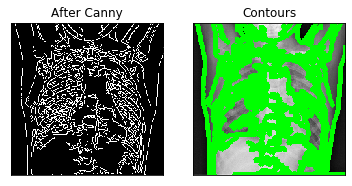

In [18]:
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)                   
cv2.drawContours(img, contours, -1, color = (0, 255, 0), thickness = 5)

plt.subplot(121),plt.imshow(edged,'gray'),plt.title('After Canny')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img),plt.title('Contours')
plt.xticks([]), plt.yticks([])
plt.show()